## Exploratory Data Analysis
> AceleraDev: Codenation <br />
> Week 3

Daniel Santos Pereira | Data & B.I Analyst | Machine Learning in Training | MCP

Data: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Columns:



* **city**: City where the property is located / Cidade onde o imóvel está localizada
* **area**: Property area / Area do imovel
* **rooms**: Quantity of rooms / Número de quartos
* **bathroom**: Quantity of bathroom / Número de banheiros
* **parking spaces**: Quantity of parking spaces / Número de vagas
* **floor**: FLoor / Andar
* **animal**: Acept animals? / Aceita animais?
* **furniture**: Furniture? / Mobiliada?
* **hoa(RS)**: Homeowners association tax / Valor do Condomínio
* **rent amount(RS)**: Rent amount / Valor do Aluguel()
* **property tax (RS)**: Property tax / IPTU
* **fire insurance (RS)**: Fire Insurance / Seguro Incendio
* **total(RS)**: Total / Valor Total

## Libraries


In [0]:
import pandas as pd

In [0]:
# Import data
df = pd.read_csv("sample_data/houses_to_rent_v2.csv")

## Checking Structures Dataframe

In [13]:
# Checking structures
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


In [14]:
# DataFrame informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [17]:
# Checking quantity null values
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [18]:
# Checking data types
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

## Problem: Discovery the rental price (rent amount RS)


### Univariate Statistics

In [20]:
# Adjusting the column name
## Note: When the average is greater than the median, there are outlaiers.

df.rename(columns={'rent amount (R$)': 'valor_aluguel'}, inplace=True)
df.head(2)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973


In [22]:
# Checking mean data
df['valor_aluguel'].mean()

3896.247194163861

In [23]:
# checking median data
df['valor_aluguel'].median()

2661.0

In [25]:
# Checking Standard deviation
## Note:
## The standard deviation is almost the average value, there is a very large
## dispersion with the rent values.
df['valor_aluguel'].std()

3408.5455176710816

In [27]:
# Checking basic statistical
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

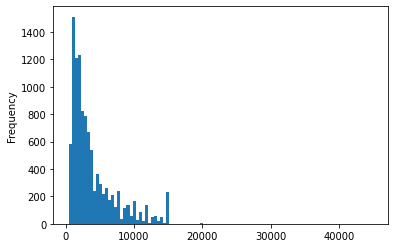

In [30]:
# With that, it is possible to observe that the data are between 450 and 5k
# and 25% of the data are in 45000
df['valor_aluguel'].plot(kind='hist', bins=100);

In [31]:
# Skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [33]:
# kurtose - leptocurtica
df.valor_aluguel.kurtosis()

4.624228179818687

## Multivariate Data Exploration

Questions
> What I know?<br />
> Who can inform me?

* Which city has the highest average rent?
* How many bathrooms are there in the higher rented homes?
* Do the most expensive properties accept animals?
* Are the most expensive properties furnished?

Perguntas
> O que eu sei?<br />
> Quem pode me informar?

* Qual a cidade com a média de aluguel mais alta?
* Quantos banheiros existem nas residências com alugueis mais altos?
* Os imóveis mais caros, aceitam animais?
* Os imóveis mais caros, são mobiliados?


In [38]:
# Which city has the highest average rent?
df.groupby('city')['valor_aluguel'].median().reset_index().sort_values(
    by='valor_aluguel',
    ascending=False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


In [0]:
# How many bathrooms are there on average in higher rented homes?
## definition: higher rents, values above 5k

#Column creation for high or low rent
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [43]:
# Counts values
df['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [45]:
# Answering the question:
## On average the houses with more expensive rents, have around 4 bathrooms
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [0]:
# Do the most expensive properties accept animals?
## Data adjustment "acept = 1" and "not acept = 0"
df['animal'] = [1 if x == 'acept' else 0 for x in df['animal']]

In [58]:
# Answering the question:
## Lower rents are more likely to accept animals
df[df['animal'] == 1]['aluguel_alto'].value_counts()

Baixo    6232
Alto     2084
Name: aluguel_alto, dtype: int64

In [0]:
# Are the most expensive properties furnished?
## Data adjustment "furnished = 1" and "not furnished = 0"
df['furniture'] = [1 if x == 'furnished' else 0 for x in df['furniture'] ]

In [63]:
# Answering the question
## Lower rents tend to be cheaper.
df[df['furniture'] == 1]['aluguel_alto'].value_counts()

Baixo    1728
Alto      878
Name: aluguel_alto, dtype: int64

Hipóteses

> Vai do senso comum<br />
> Correlação é uma boa medida para validar as hipóteses

* São Paulo é a cidade com o aluguel mais caro.
* Quanto mais banheiro em um imóvel maior o valor do aluguel
* Os imóveis com mobilia tem o aluguel mais alto


Hypotheses

> It goes from common sense<br />
> Correlation is a good measure to validate the hypotheses

* São Paulo is the city with the most expensive rent.
* The more bathroom in a property the higher the rent
* Furnished properties have the highest rent

In [71]:
# The more bathroom in a property, the higher the rent
## Thus, it is possible to verify that there is a correlation between the variables
df[['valor_aluguel','bathroom']].corr()

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


In [83]:
# Creating a DataFrame with columns and their types
aux = pd.DataFrame({'coluna':df.columns, 'tipos': df.dtypes})

# Creating a list to return only the entire data
list_aux = list(aux[aux['tipos'] == 'int64']['coluna'])
list_aux

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'animal',
 'furniture',
 'hoa (R$)',
 'valor_aluguel',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [92]:
# View of columns that correlate with rent
for coluna in list_aux:
  print('Coluna: {0}'.format(coluna))
  print(df[['valor_aluguel', coluna]].corr(method='spearman'))
  print('\n')

Coluna: area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000


Coluna: rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000


Coluna: bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000


Coluna: parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000


Coluna: animal
               valor_aluguel    animal
valor_aluguel       1.000000  0.082569
animal              0.082569  1.000000


Coluna: furniture
               valor_aluguel  furniture
valor_aluguel        1.00000    0.21823
furniture            0.21823    1.00000


Coluna: hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000


Coluna: valor_aluguel
    

In [74]:
# Verificação da correlação entre todas as variáveis numericas
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                  int64
furniture               int64
hoa (R$)                int64
valor_aluguel           int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
aluguel_alto           object
dtype: object